# Final project on Supervised Machine Learning: Classification

## Analysing the Breast Cancer Dataset

## Introdcution and Dataset Description
### Source: 
The breast cancer dataset to be used in this analysis was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. Downloaded from the University of California (UCI) Machine Learning Repository. Link- https://archive.ics.uci.edu/ml/datasets/breast+cancer

### Description: 
The dataset includes 201 instances of benign class (non-cancerous) and 85 instances of the malignant class (Cancerous).  The instances are described by 9 attributes, some of which are linear and some are nominal. They include:


In [1]:
#Stop all warnings
def warn(*args, **kwargs):
    pass
import warnings

warnings.warn = warn
rs =42

In [58]:
#first we need to import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

import plotly.express as px
import datetime 
import requests
import json

from sklearn.preprocessing import LabelEncoder

In [3]:
#Data import
source  = 'Datasets/breast_cancer.DATA'

#we include column names in our dataset

columns = ['Class','age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiat']
b_df = pd.read_csv(source, header=None, names = columns)

In [4]:
b_df.head(5)

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
b_df.shape
#the dataset have 286 instances with 9 features and a target variable

(286, 10)

In [6]:
b_df.Class.unique()
#'no-recurrence-events' stands for benign while 'recurrence-events' stands for malignant

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

<AxesSubplot:>

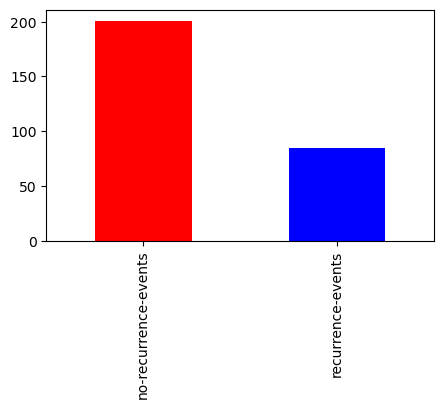

In [7]:
b_df.Class.value_counts().plot(kind = 'bar', color = ['red', 'blue'], figsize=(5,3))
#We can see that the datasets is infact imbalanced

In [8]:
b_df.dtypes
#all the attributes are of type objects excpet one ie.deg-malig

Class          object
age            object
menopause      object
tumor_size     object
inv_nodes      object
node_caps      object
deg_malig       int64
breast         object
breast_quad    object
irradiat       object
dtype: object

In [9]:
#checking for Nan
a = b_df[b_df['breast_quad'].isin(['?'])].index.tolist()
b = b_df[b_df['node_caps'].isin(['?'])].index.tolist()
c = a + b
print(c)

[206, 145, 163, 164, 183, 184, 233, 263, 264]


In [10]:
#Fucntion to check for attributes unique values
def cate(b_df):
    result = {}
    
    result['age'] = b_df.age.unique()
    result['menopause'] = b_df.menopause.unique()
    result['tumor_size'] = b_df.tumor_size.unique()
    result['inv_nodes'] = b_df.inv_nodes.unique()
    result['node_caps'] = b_df.node_caps.unique()
    result['deg_malig'] = b_df.deg_malig.unique()
    result['breast'] = b_df.breast.unique()
    result['breast_quad'] = b_df.breast_quad.unique()
    result['irradiat'] = b_df.irradiat.unique()
    
    return result

In [11]:
cate(b_df) #we can see that there are '?' in two of the columns

{'age': array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object),
 'menopause': array(['premeno', 'ge40', 'lt40'], dtype=object),
 'tumor_size': array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
        '40-44', '35-39', '5-9', '45-49'], dtype=object),
 'inv_nodes': array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
       dtype=object),
 'node_caps': array(['no', 'yes', '?'], dtype=object),
 'deg_malig': array([3, 2, 1], dtype=int64),
 'breast': array(['left', 'right'], dtype=object),
 'breast_quad': array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
       dtype=object),
 'irradiat': array(['no', 'yes'], dtype=object)}

In [12]:
#First we search for '?'
missing_values_node_caps = b_df[b_df['node_caps'].isin(['?'])].index.tolist()
missing_values_breast_quad = b_df[b_df['breast_quad'].isin(['?'])].index.tolist()
missing_index = missing_values_node_caps + missing_values_breast_quad
print(f"Combined indices of missing values: {missing_index}")

Combined indices of missing values: [145, 163, 164, 183, 184, 233, 263, 264, 206]


In [13]:
b_df = b_df.drop(missing_index)

In [14]:
cate(b_df)#we can see that there are no more '?' in 'node_caps' and 'breast_quad'

{'age': array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object),
 'menopause': array(['premeno', 'ge40', 'lt40'], dtype=object),
 'tumor_size': array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
        '40-44', '35-39', '5-9', '45-49'], dtype=object),
 'inv_nodes': array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
       dtype=object),
 'node_caps': array(['no', 'yes'], dtype=object),
 'deg_malig': array([3, 2, 1], dtype=int64),
 'breast': array(['left', 'right'], dtype=object),
 'breast_quad': array(['left_low', 'right_up', 'left_up', 'right_low', 'central'],
       dtype=object),
 'irradiat': array(['no', 'yes'], dtype=object)}

In [15]:
#Now we perform label encoder and onehotencoder on the categorical variables 
label_encod = LabelEncoder()
#All the variables infact needs encoding of different types
b_df['age'] = label_encod.fit_transform(b_df['age'])
b_df['tumor_size'] = label_encod.fit_transform(b_df['tumor_size'])
b_df['menopause'] = label_encod.fit_transform(b_df['menopause'])
b_df['inv_nodes'] = label_encod.fit_transform(b_df['inv_nodes'])
b_df['node_caps'] = label_encod.fit_transform(b_df['node_caps'])
b_df['breast'] = label_encod.fit_transform(b_df['breast'])
b_df['breast_quad'] = label_encod.fit_transform(b_df['breast_quad'])
b_df['irradiat'] = label_encod.fit_transform(b_df['irradiat'])
#Finally the class
b_df['Class'] = label_encod.fit_transform(b_df['Class'])


In [16]:
b_df.head(5)

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0


In [17]:
cate(b_df)

{'age': array([1, 2, 4, 3, 5, 0]),
 'menopause': array([2, 0, 1]),
 'tumor_size': array([ 5,  3,  2,  0,  4, 10,  1,  7,  6,  9,  8]),
 'inv_nodes': array([0, 5, 6, 4, 2, 1, 3]),
 'node_caps': array([0, 1]),
 'deg_malig': array([3, 2, 1], dtype=int64),
 'breast': array([0, 1]),
 'breast_quad': array([1, 4, 2, 3, 0]),
 'irradiat': array([0, 1])}

In [18]:
b_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,277.0,0.292419,0.455697,0.0,0.0,0.0,1.0,1.0
age,277.0,2.642599,1.010125,0.0,2.0,3.0,3.0,5.0
menopause,277.0,1.093863,0.988264,0.0,0.0,2.0,2.0,2.0
tumor_size,277.0,4.068592,2.178366,0.0,3.0,4.0,5.0,10.0
inv_nodes,277.0,1.014440,1.876574,0.0,0.0,0.0,0.0,6.0
node_caps,277.0,0.202166,0.402342,0.0,0.0,0.0,0.0,1.0
deg_malig,277.0,2.057762,0.729989,1.0,2.0,2.0,3.0,3.0
breast,277.0,0.476534,0.500353,0.0,0.0,0.0,1.0,1.0
breast_quad,277.0,1.787004,1.097483,0.0,1.0,2.0,2.0,4.0
irradiat,277.0,0.223827,0.417562,0.0,0.0,0.0,0.0,1.0


In [19]:
b_df.skew()

Class          0.917675
age            0.019817
menopause     -0.189562
tumor_size     0.496189
inv_nodes      1.460108
node_caps      1.491267
deg_malig     -0.089498
breast         0.094479
breast_quad    0.629747
irradiat       1.332411
dtype: float64

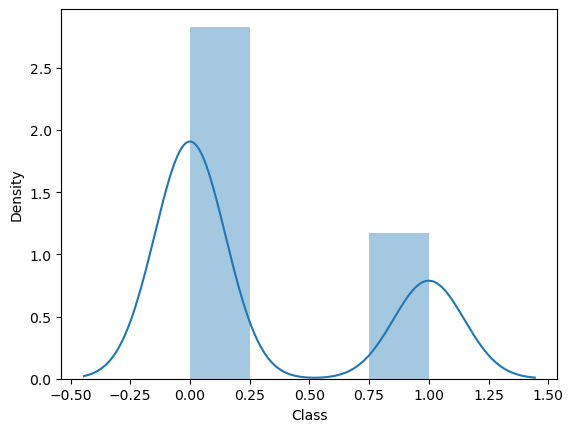

In [20]:
#Log Transformation
b_df_untransformed = sns.distplot(b_df['Class'])

In [21]:
#we then perform log transform to correct the high skewness
#log_transformed = np.log(b_df['Class']);

In [22]:
#b_df_transformed = sns.distplot(log_transformed)

In [23]:
#Using the sqrt fucntion on dataset for controlling skewness
'''b_df = np.sqrt(b_df)
b_df'''

'b_df = np.sqrt(b_df)\nb_df'

In [24]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
b_df = scaler.fit_transform(b_df)
b_df'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nb_df = scaler.fit_transform(b_df)\nb_df'

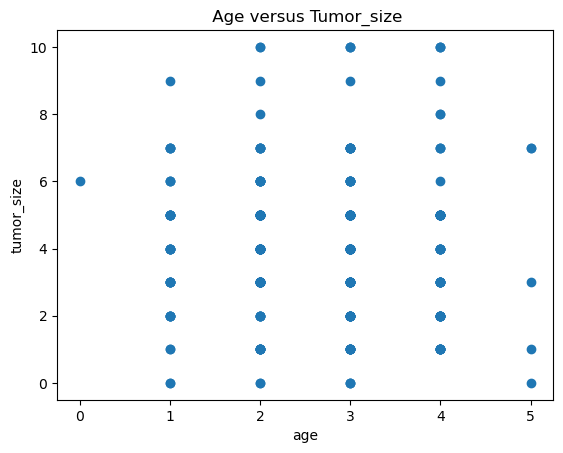

In [25]:
#A simple scatter plot to visualise relationship between attributes and target class
ax = plt.axes()
ax.scatter(b_df.age, b_df.tumor_size)
ax.set(xlabel = 'age', ylabel = 'tumor_size', title = " Age versus Tumor_size");

In [26]:
#sample = b_df.plot.scatter(x = 'age', y = 'tumor_size')

In [27]:
'''#A simple scatter plot to visualise relationship between attributes 
ax = plt.axes()
ax.scatter(b_df.age, b_df.breast)
ax.set(xlabel = 'age', ylabel = 'breast', title = " Age versus breast");'''

'#A simple scatter plot to visualise relationship between attributes \nax = plt.axes()\nax.scatter(b_df.age, b_df.breast)\nax.set(xlabel = \'age\', ylabel = \'breast\', title = " Age versus breast");'

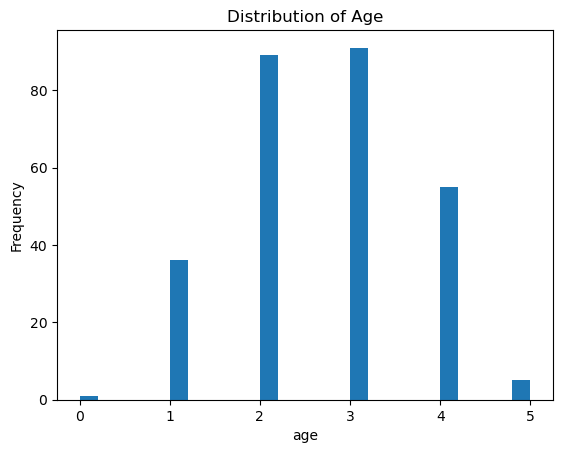

In [28]:
#Making a histogram of any one of the features.
ax = plt.axes()
ax.hist(b_df.age, bins = 25)
ax.set(xlabel = 'age', ylabel = 'Frequency', title = 'Distribution of Age');

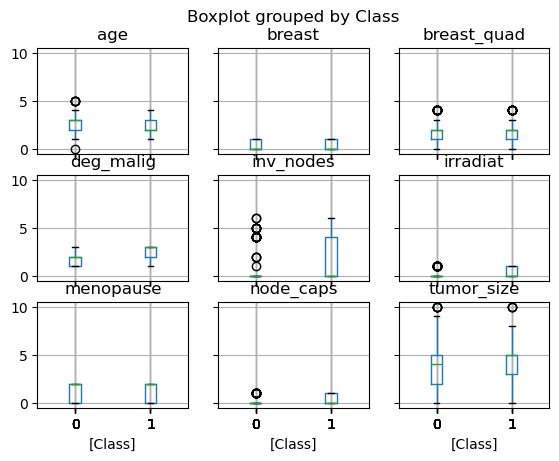

In [29]:
#using boxplot for each feature
b_df.boxplot(by = 'Class');

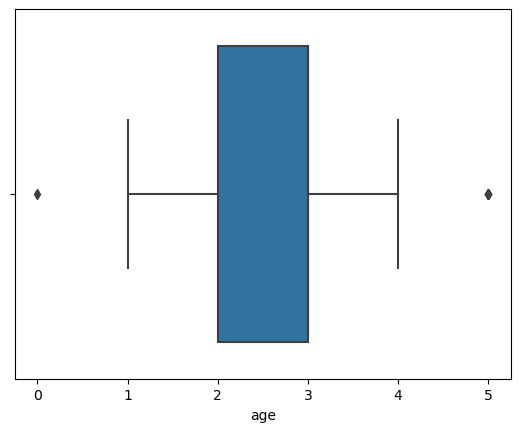

In [30]:
sns.boxplot(b_df['age']);

<AxesSubplot:xlabel='age', ylabel='Density'>

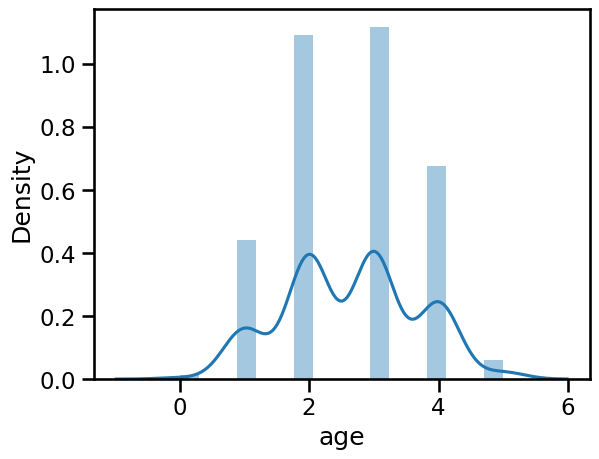

In [44]:
sns.distplot(b_df['age'])

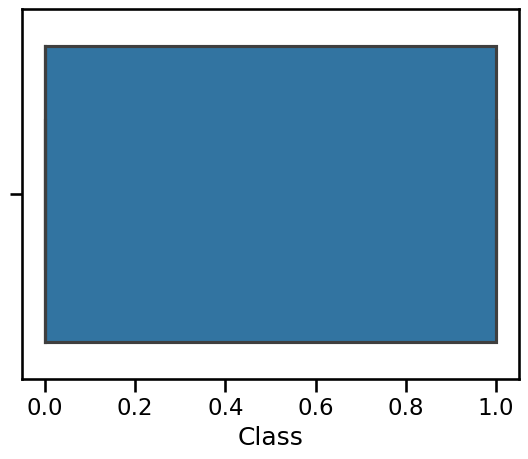

In [43]:
sns.boxplot(b_df['Class']);

<AxesSubplot:xlabel='Class', ylabel='Density'>

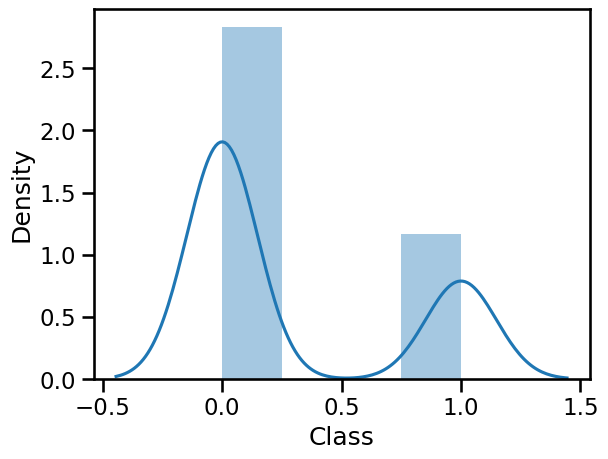

In [46]:
sns.distplot(b_df['Class'])

<AxesSubplot:xlabel='tumor_size'>

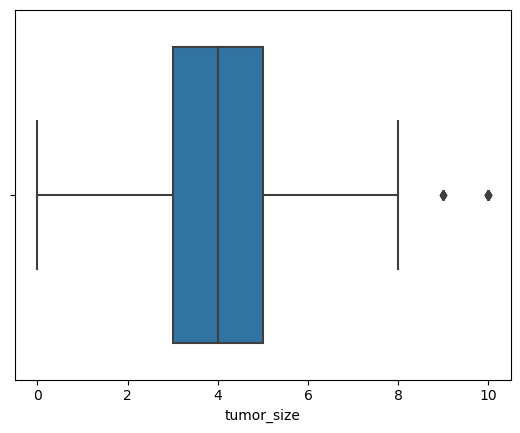

In [31]:
sns.boxplot(x = b_df['tumor_size'])

In [32]:
#deleting outliers by checking the last two biggets values. Just an example

b_df.sort_values(by = 'tumor_size', ascending = False)[:2]

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
69,0,4,0,10,0,0,2,0,1,0
8,0,2,2,10,0,0,2,0,1,0


In [33]:
#b_df.drop(b_df.index[[69,8]], inplace = True)

In [34]:
#sns.boxplot(x = b_df['tumor_size'])

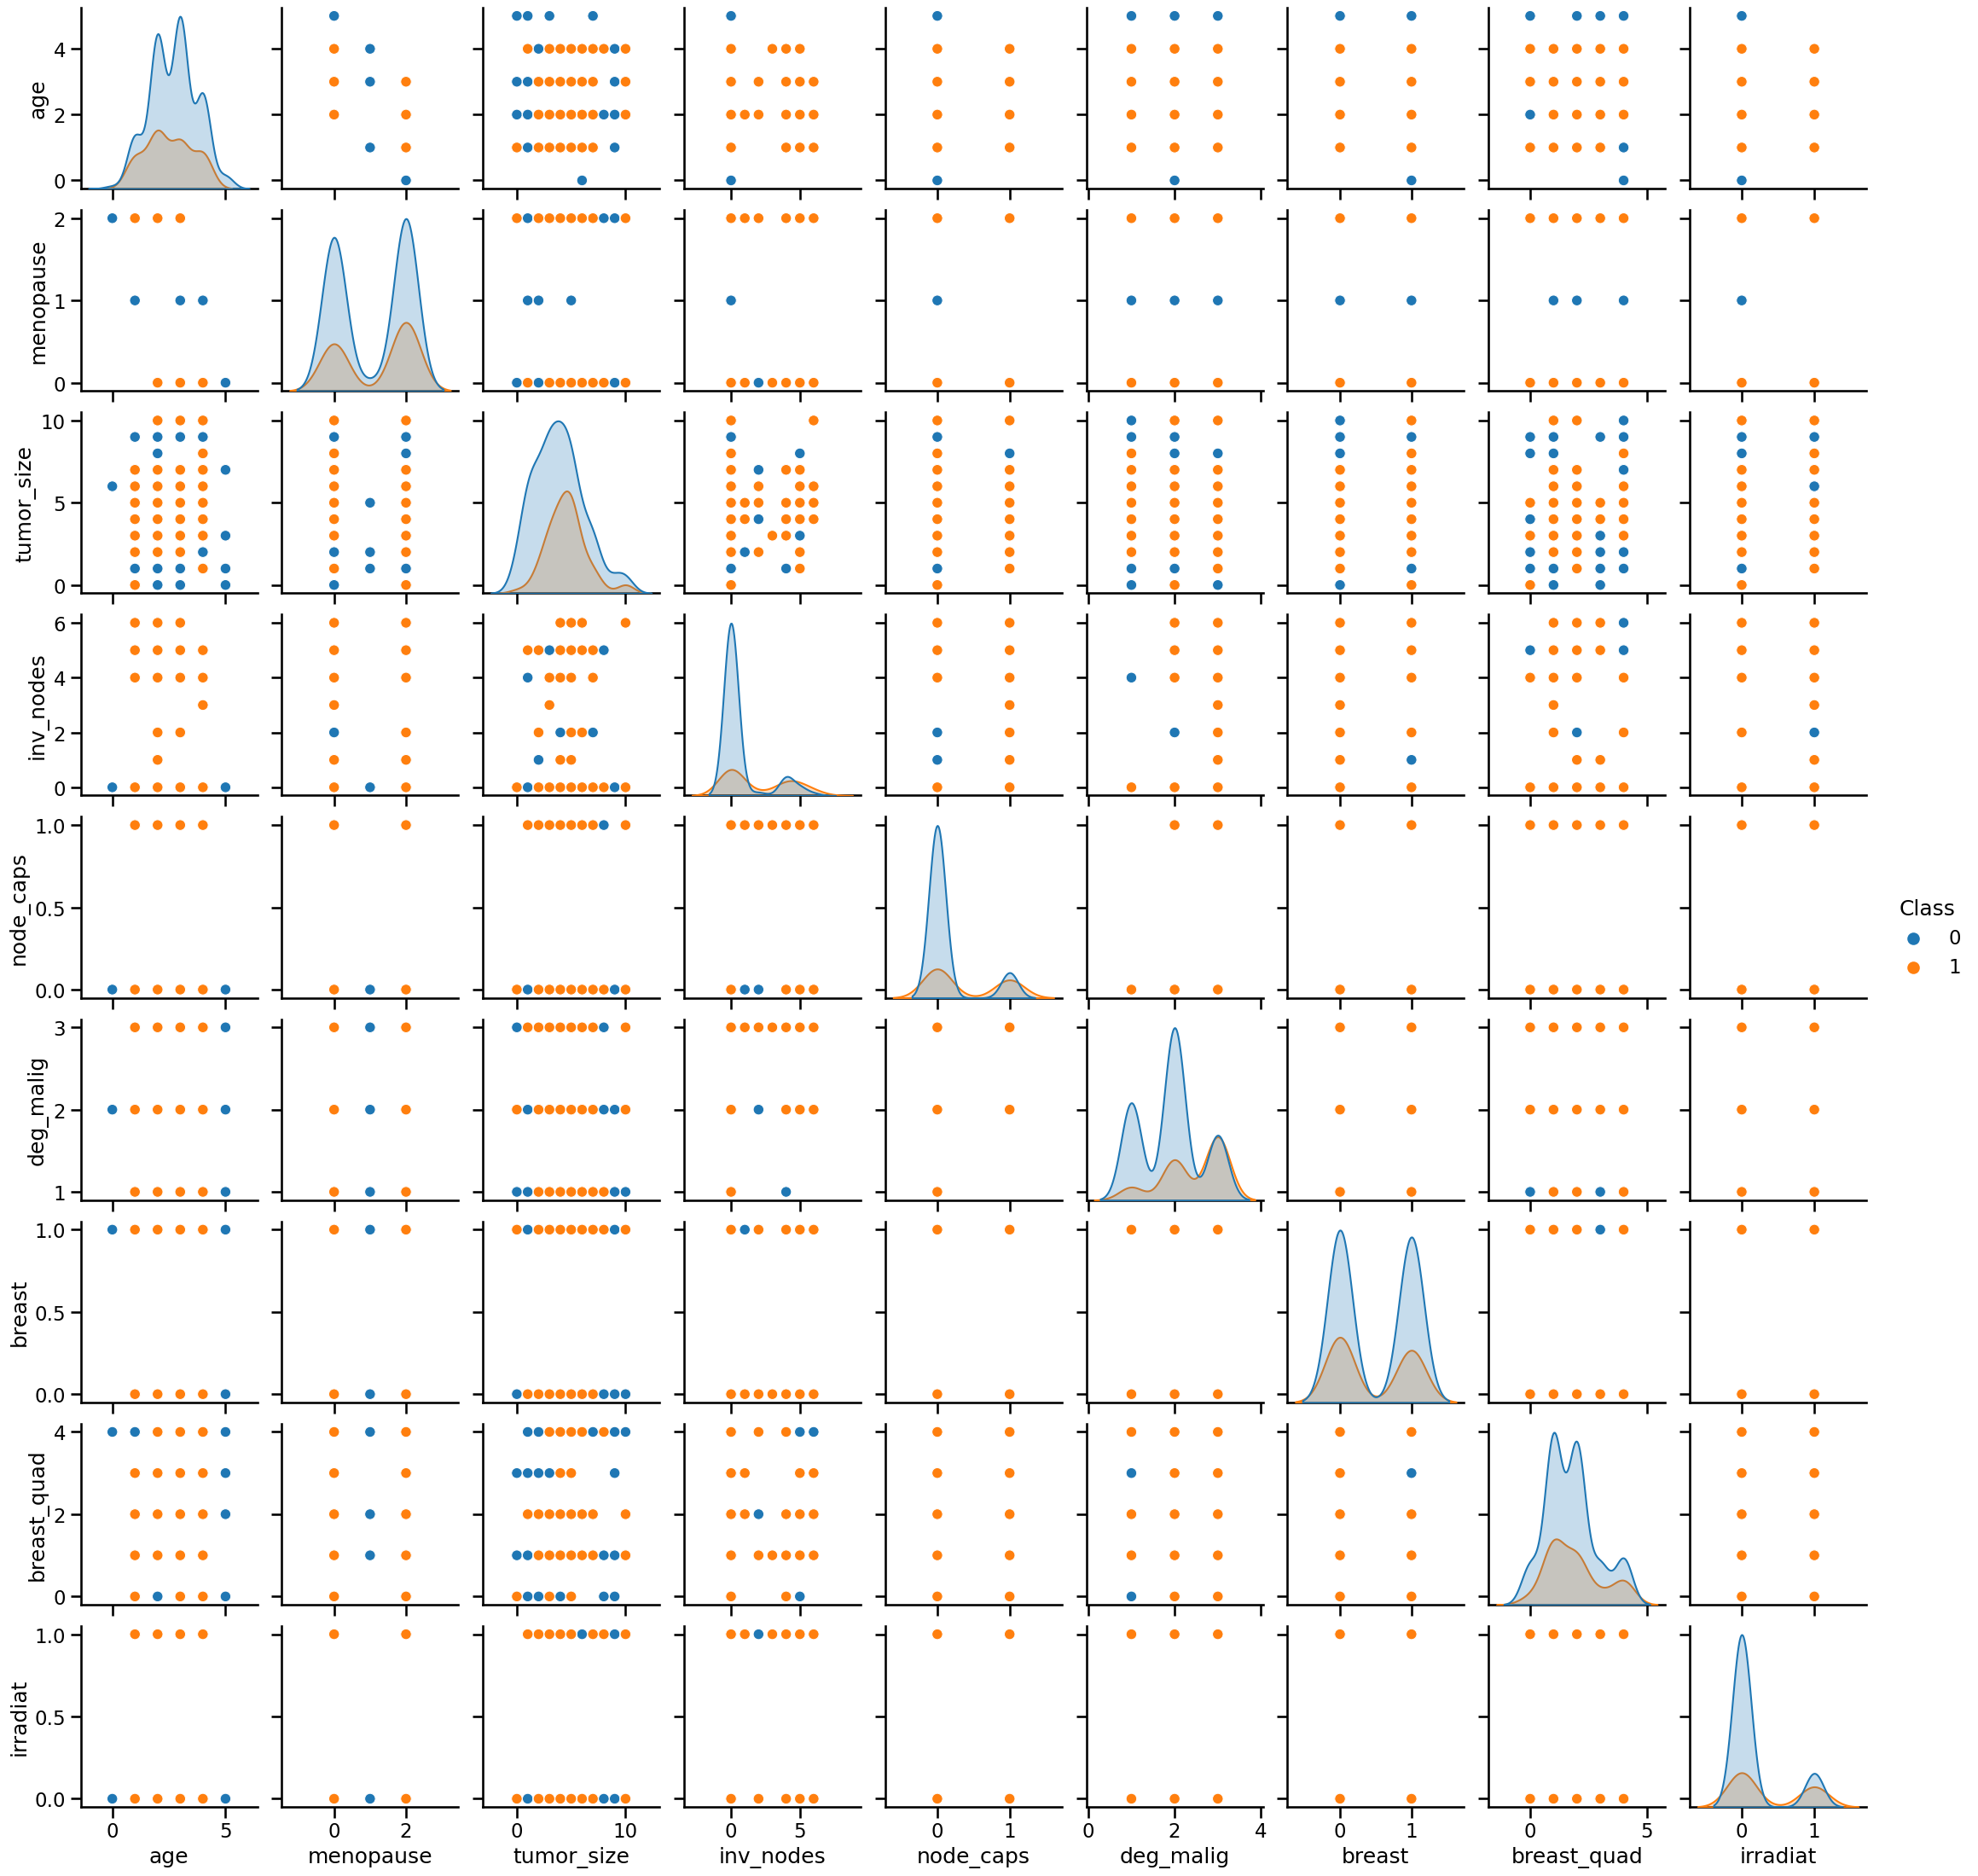

In [35]:
sns.set_context('talk')
sns.pairplot(b_df, hue = 'Class');

In [36]:
b_df

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,0,2,0,2,0
282,1,1,2,3,0,0,3,0,2,1
283,1,4,0,3,0,0,1,1,2,0
284,1,2,0,5,4,0,3,0,1,0


In [37]:
#checking for correlation of individual variables with the taget varaible.FETAURE SELECTION
b_df_corr = b_df.corr()['Class'][1:]
#Top_features = b_df_corr[abs(b_df_corr) > 0.1 ].sort_values(ascending = False)
Top_features = b_df_corr.sort_values(ascending = False)
print('There are {} features with high correlation to the Class.\n'.format(len(Top_features)),Top_features)

There are 9 features with high correlation to the Class.
 deg_malig      0.330253
inv_nodes      0.325523
node_caps      0.289002
irradiat       0.226020
tumor_size     0.143968
breast_quad    0.059788
menopause      0.059512
breast        -0.041304
age           -0.086981
Name: Class, dtype: float64


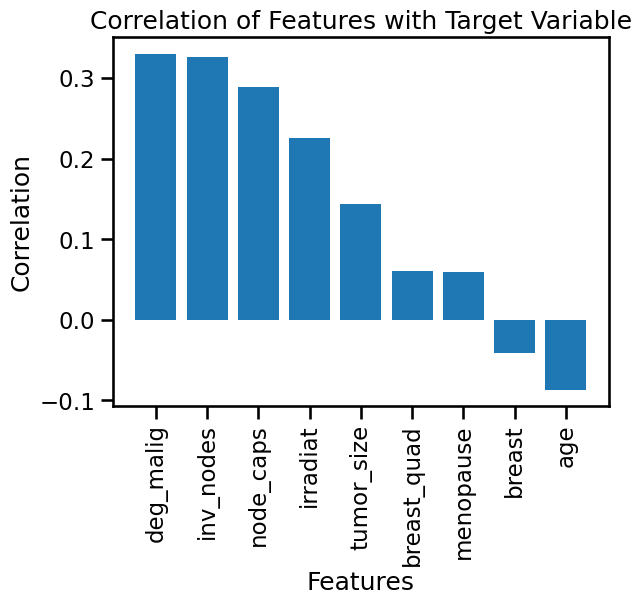

In [49]:
plt.bar(Top_features.index, Top_features.values)

# Set plot title and axis labels
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [38]:
'''Show_duplicates = pd.DataFrame(b_df.iloc[1,:]) 
Show_duplicates.T'''

'Show_duplicates = pd.DataFrame(b_df.iloc[1,:]) \nShow_duplicates.T'

In [39]:
#checking if all indices of the datasets is unique
b_df.index.is_unique

True

In [40]:
#removing duplicates
rem_duplicates = b_df.drop_duplicates()
rem_duplicates

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,0,2,0,2,0
282,1,1,2,3,0,0,3,0,2,1
283,1,4,0,3,0,0,1,1,2,0
284,1,2,0,5,4,0,3,0,1,0


In [41]:
rem_duplicates.index.is_unique

True

In [42]:
'''exam = b_df['age'].is_unique
exam'''

"exam = b_df['age'].is_unique\nexam"

## Hypothesis

### First lets get the number of observations for each menopause group
#### Note: 
•	lt40: "lt" stands for "less than," and "40" refers to the age of 40.

•	ge40: "ge" stands for "greater than or equal to," and "40" refers to the age of 40.

•	premeno: "premeno" is an abbreviation for "premenopausal." It refers to the stage in a woman's life before she reaches menopause

#### Also, lt40 = 1, ge40 = 0, premeno = 2

In [51]:
less_than_40 = b_df.loc[b_df.menopause == 1]
greater_or_equalto_40 = b_df.loc[b_df.menopause == 0]
menopausal = b_df.loc[b_df.menopause == 2]

In [54]:
less_than_40_TS = less_than_40.tumor_size
greater_or_equalto_40_TS = greater_or_equalto_40.tumor_size
menopausal_TS = menopausal.tumor_size

<AxesSubplot:xlabel='tumor_size', ylabel='Density'>

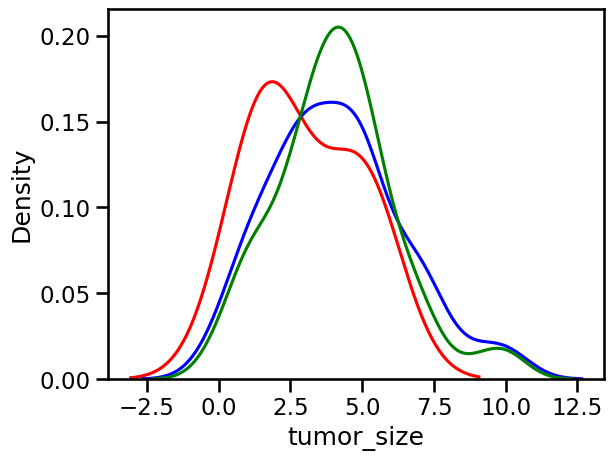

In [55]:
sns.distplot(less_than_40_TS, color = 'red', hist = False)
sns.distplot(greater_or_equalto_40_TS , color = 'blue', hist = False)
sns.distplot(menopausal_TS, color = 'green', hist = False)

### We will start with less_than_40 and greate_or_equalto_40.

In [56]:
less_than_40.tumor_size.mean()

3.0

In [57]:
greater_or_equalto_40.tumor_size.mean()

4.097560975609756

Next, we will obtain our statistics, t-value and p-value. We will use scipy.stats library and ttest_ind() function to calculate these parameters.

In [66]:
alpha = 0.05
t_value1, p_value1 = stats.ttest_ind(less_than_40_TS, greater_or_equalto_40_TS)
print("t_value1 = ",round(t_value1,4), ", p_value1 = ", round(p_value1, 4))

t_value1 =  -1.0473 , p_value1 =  0.2969


Next, although optional, it is useful to print 'if/else' statements to make our conclusions about the the hypothesis.

Our hypothesis is that there is no significant difference between the tumor size of <40 and >=40

In [71]:
if p_value1 < alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (round(p_value1, 4),alpha))
    print("Reject the null hypothesis that there is no difference between tumor size of less_than_40 and tumor size of greater_than_or_equal_to_40.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (round(p_value1,4),alpha))
    print("Fail to reject the null hypothesis and say that there is no difference between tumor size of less_than_40 and tumor size of greater_than_or_equal_to_40.")

Conclusion: since p_value 0.9491 is greater than alpha 0.05 
Fail to reject the null hypothesis and say that there is no difference between tumor size of less_than_40 and tumor size of greater_than_or_equal_to_40.


### Next is with greate_or_equalto_40 and premenopausal

In [68]:
t_value1, p_value1 = stats.ttest_ind(greater_or_equalto_40_TS, menopausal_TS)
print("t_value1 = ",round(t_value1,4), ", p_value1 = ", round(p_value1, 4))

t_value1 =  0.0639 , p_value1 =  0.9491


Our hypothesis is that there is no significant difference between the tumor size of  >=40 and menopausal

In [70]:
if p_value1 < alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (round(p_value1, 4),alpha))
    print("Reject the null hypothesis that there is no difference between tumor size of greater_than_or_equal_to_40 and menopausal.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (round(p_value1,4),alpha))
    print("Fail to reject the null hypothesis and say that there is no difference between tumor size of greater_than_or_equal_to_40 and menopausal.")

Conclusion: since p_value 0.9491 is greater than alpha 0.05 
Fail to reject the null hypothesis and say that there is no difference between tumor size of greater_than_or_equal_to_40 and menopausal.


### Lastly is with less_than_40 and premenopausal

In [72]:
t_value1, p_value1 = stats.ttest_ind(less_than_40_TS, menopausal_TS)
print("t_value1 = ",round(t_value1,4), ", p_value1 = ", round(p_value1, 4))

t_value1 =  -1.1466 , p_value1 =  0.2533


Our hypothesis is that there is no significant difference between the tumor size of  <40 and menopausal

In [74]:
if p_value1 < alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (round(p_value1, 4),alpha))
    print("Reject the null hypothesis that there is no difference between tumor size of less_than_40 and menopausal.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (round(p_value1,4),alpha))
    print("Fail to reject the null hypothesis and say that there is no difference between tumor size of less_than_40 and menopausal.")

Conclusion: since p_value 0.2533 is greater than alpha 0.05 
Fail to reject the null hypothesis and say that there is no difference between tumor size of less_than_40 and menopausal.


### End of Notebook